## GPS PyTracker V2 Battery Tests
In this test I wanted to get the power usage details for the Pycom Pytrack V2 board.
The test were run until my power meter had seen at least 30mAh of current used and then the average current use per hour was recorded. The measurements were made using a [usb power meter](https://www.amazon.com/gp/product/B07X3HST7V/ref=ppx_yo_dt_b_asin_title_o04_s00?ie=UTF8&psc=1) , the measurements were made over enough time to get a reasonable amount of mAh's measured (at least 30mAh) and then the resulting time in hours divided into the total mAh to get a mAh value for one hour's power usage. 

![USB Power meter](images/usb-meter.jpg "USB power meter")


The data and results, from these tests, are shown below. 

### A: Pytrack V2 , GPS and Sleeps
I look at the  [pytrack 2](https://pycom.io/product/pytrack-2-0-x/) expansion board. This looks like a good basis for my boat monitor as it contains a GPS, and I2C interface (I'll use that for temp/pressure/humiity readings). As well I can still use a GPIO pin(s) to get house battery voltage readings, and other switch type sensors (i.e. bilge water detector). I use the special go_to_sleep() function from pycom to save as much power as possable while the board is sleeping between sensor collections. Note: I couldn't get this board to go into a very low poer mode more typical of IOT (Usually you would want to drop sleeping current usage to the low uA range).  

![pytrack](images/pytrack.jpg "pytrack V2")




In [2]:
power_data = {
    "X" : [300,3600],
    "A": [12,4.65]
} 

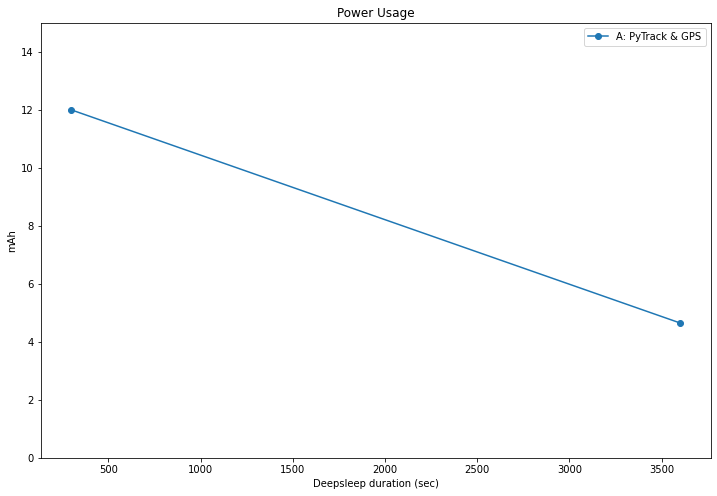

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12, 8))
line1, = ax.plot(power_data["X"], power_data["A"], label='A: PyTrack & GPS',marker='o')
ax.set_ylabel('mAh')
ax.set_xlabel('Deepsleep duration (sec)')
ax.set_title('Power Usage') 
ax.legend() 
plt.ylim(top=15)  
plt.ylim(bottom=0) 
plt.show() 



### Conclusion:
Using SigFox, the PyTrack V2 GPS and the go_to_sleep() routine I get 4mA average current usage when using a 1 hour sleep. This would give ~ 10days use on a typical 1000mAh LiIon backup battery. This isn't great for IOT, but for my usage on a boat where it is powered primarly from a AGM 12V battery with solar recharging, it should not be a problem. The backup batery would just be of use for if the main boat battery fails and so I would have 10 days of notification of this.